## Import Python Packages

In [1]:
# Preliminaries
import pandas as pd
import numpy as np
import datetime

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

now = datetime.datetime.now

## MNIST Dataset
### 70,000 images of handwritten digits in grayscale (0=black, 255 = white)

## Load Data Into Train and Test Samples

<img src="notebook_pics/train_test_split.png" alt="Drawing" style="width: 600px;"/>

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

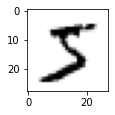

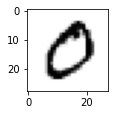

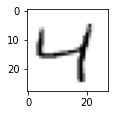

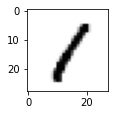

In [3]:
for i in np.arange(0,4):
    plt.figure(figsize=(3,1.5))
    plt.imshow(x_train[i], cmap='Greys')
    plt.show()

In [4]:
print(y_train[0:4])

[5 0 4 1]


## Image as Data (Pixels)

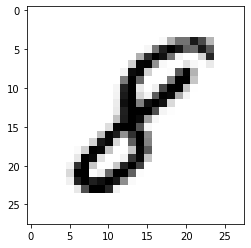

In [5]:
image_index = 7777
plt.imshow(x_train[image_index], cmap='Greys');

In [6]:
pd.set_option("max_rows", 100)
pd.set_option("max_columns", 100)
pd.DataFrame(x_train[7777])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,104,159,159,232,195,102,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,154,227,254,235,174,167,233,184,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,217,254,239,159,23,0,0,68,221,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,72,249,251,131,11,0,0,53,13,2,40,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,26,243,250,72,0,0,5,184,251,103,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,152,254,170,0,0,0,148,254,254,85,0,0,0,0,0,0


## Data Prep

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Neural Networks & Deep Learning



<img src="notebook_pics/lin_reg.png" alt="Drawing" style="width: 600px;"/>

<img src="notebook_pics/simple_and_dl_nn.png" alt="Drawing" style="width: 700px;"/>

## We could do this...

<img src="notebook_pics/nn_pixels.png" alt="Drawing" style="width: 700px;"/>

## But pixels are more related to adjacent pixels...

## Convolution Neural Network

### Blocks of adjacent pixels are grouped together and combined using trained weights

![ChessUrl](https://miro.medium.com/max/875/1*ciDgQEjViWLnCbmX-EeSrA.gif "chess")

## Building the layers is quite complex, luckily a lot of work has already been done

<img src="notebook_pics/nn_layers.png" alt="Drawing" style="width: 700px;"/>

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Model Training

In [9]:
t = now()
model.fit(x=x_train,y=y_train, epochs=2, batch_size = 500)
print('Training time: %s' % (now() - t))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/2
120/120 [==============================] - 16s 124ms/step - loss: 0.6970 - accuracy: 0.7931
Epoch 2/2
120/120 [==============================] - 15s 126ms/step - loss: 0.0662 - accuracy: 0.9799
Training time: 0:00:31.466257
Test accuracy: 0.9850000143051147


In [10]:
model

## Test out an image

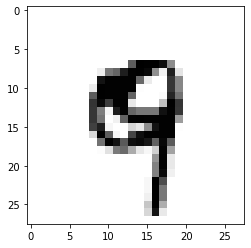

In [11]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [12]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9
